<a href="https://colab.research.google.com/github/ratnesh003/HCLTech-Tasks/blob/main/Bronze%20Badge%20Assignment/HCLTech_ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 1: Predicting Product Sales Using Multivariate Linear Regression

Can you build a multivariate linear regression model that can predict the product sales based on the advertising budget allocated to different channels. The features are TV Budget (\$),Radio Budget (\$),Newspaper Budget (\$) and the output is Sales (units)
The dataset is give below

|TV Budget (\$)|Radio Budget (\$)|Newspaper Budget (\$)|Sales (units)|
|:--:|:--:|:--:|:--:|
230.1|37.8|69.2|22.1
44.5|39.3|45.1|10.4
17.2|45.9|69.3|9.3
151.5|41.3|58.5|18.5
180.8|10.8|58.4|12.9
8.7|48.9|75.0|7.2
57.5|32.8|23.5|11.8
120.2|19.6|11.6|13.2
144.1|16.0|40.3|15.6
111.6|12.6|37.9|12.2

##### Importing the required Libraries

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

##### Creating the dataset

In [ ]:
data = {
    "TV Budget ($)": [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 144.1, 111.6],
    "Radio Budget ($)": [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 16.0, 12.6],
    "Newspaper Budget ($)": [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 40.3, 37.9],
    "Sales (units)": [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 15.6, 12.2]
}

df = pd.DataFrame(data)

##### Splitting features and target

In [ ]:
X = df[["TV Budget ($)", "Radio Budget ($)", "Newspaper Budget ($)"]]
y = df["Sales (units)"]

##### Building and fitting the linear regression model

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

##### Coefficients and intercept

In [ ]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 0.07045872  0.176354   -0.05711555]
Intercept: 3.2207019780103145


##### Predictions

In [ ]:
y_pred = model.predict(X)

##### Display results

In [ ]:
results_df = df.copy()
results_df["Predicted Sales (units)"] = y_pred

print("Predicted Sales using Multivariate Linear Regression:\n")
display(results_df)

Predicted Sales using Multivariate Linear Regression:



,TV Budget ($),Radio Budget ($),Newspaper Budget ($),Sales (units),Predicted Sales (units)
0,230.1,37.8,69.2,22.1,22.147039
1,44.5,39.3,45.1,10.4,10.710916
2,17.2,45.9,69.3,9.3,8.569133
3,151.5,41.3,58.5,18.5,17.837359
4,180.8,10.8,58.4,12.9,14.528714
5,8.7,48.9,75.0,7.2,8.173737
6,57.5,32.8,23.5,11.8,11.714274
7,120.2,19.6,11.6,13.2,14.483839
8,144.1,16.0,40.3,15.6,13.893711
9,111.6,12.6,37.9,12.2,11.141277


##### Plot actual vs predicted sales

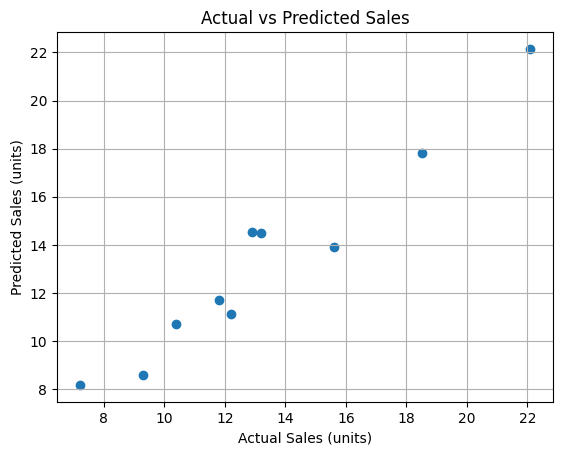

In [ ]:
plt.scatter(y, y_pred)
plt.xlabel("Actual Sales (units)")
plt.ylabel("Predicted Sales (units)")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()

##### Model Equation

In [ ]:
print(f"Sales = {intercept:.2f} + ({coefficients[0]:.4f} * TV) + ({coefficients[1]:.4f} * Radio) + ({coefficients[2]:.4f} * Newspaper)")

Sales = 3.22 + (0.0705 * TV) + (0.1764 * Radio) + (-0.0571 * Newspaper)


### Problem 2: Predicting Employee Attrition Using K-Nearest Neighbors (KNN) Classification

can you predict the employee attrition in an organization based on the following features. The features and the dataset are given below. use a classification model with KNN algorithm
Features:

- **Age**: Age of the employee (numerical).
- **JobRole**: The job role/position of the employee (categorical).
- **MonthlyIncome**: Employee's monthly salary (numerical).
- **JobSatisfaction**: A rating from 1 to 4 indicating the employee's satisfaction with the job (numerical).
- **YearsAtCompany**: Number of years the employee has been at the company (numerical).
- **Attrition**: Target label indicating whether the employee left the company (1 for attrition, 0 for no attrition)

|Age|JobRole|MonthlyIncome|JobSatisfaction|YearsAtCompany|Attrition|
|:---:|:---:|:---:|:---:|:---:|:---:|
29|Sales Executive|4800|3|4|1
35|Research Scientist|6000|4|8|0
40|Laboratory Technician|3400|2|6|0
28|Sales Executive|4300|3|3|1
45|Manager|11000|4|15|0
25|Research Scientist|3500|1|2|1
50|Manager|12000|4|20|0
30|Sales Executive|5000|2|5|0
37| Laboratory Technician|3100|2|9|0
26| Research Scientist|4500|3|2|1

##### Importing Libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

##### Create dataset

In [ ]:
data = {
    "Age": [29, 35, 40, 28, 45, 25, 50, 30, 37, 26],
    "JobRole": ["Sales Executive", "Research Scientist", "Laboratory Technician", "Sales Executive", "Manager",
                "Research Scientist", "Manager", "Sales Executive", "Laboratory Technician", "Research Scientist"],
    "MonthlyIncome": [4800, 6000, 3400, 4300, 11000, 3500, 12000, 5000, 3100, 4500],
    "JobSatisfaction": [3, 4, 2, 3, 4, 1, 4, 2, 2, 3],
    "YearsAtCompany": [4, 8, 6, 3, 15, 2, 20, 5, 9, 2],
    "Attrition": [1, 0, 0, 1, 0, 1, 0, 0, 0, 1]
}

df = pd.DataFrame(data)

##### Encode categorical feature

In [ ]:
le = LabelEncoder()
df["JobRole"] = le.fit_transform(df["JobRole"])

##### Split data into features and target

In [ ]:
X = df[["Age", "JobRole", "MonthlyIncome", "JobSatisfaction", "YearsAtCompany"]]
y = df["Attrition"]

##### Standardize numerical features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

##### KNN model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

##### Predictions

In [ ]:
y_pred = knn.predict(X_test)

##### Evaluation

In [ ]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=False)

print("Classification Report:\n", report)
print(f"Accuracy: {acc:.2f}")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Accuracy: 0.67


##### Confusion Matrix Plot

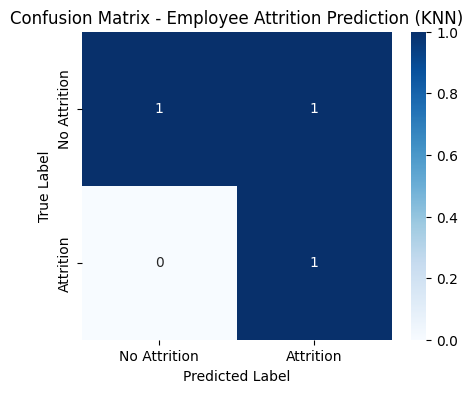

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Employee Attrition Prediction (KNN)")
plt.show()

### Problem 3: Pima Indians Diabetes Neural Network

write a python program to draw the neural network for the the pima indians diabetes prediction problem which was discussed in the class


|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
|---:|---:|---:|---:|---:|---:|---:|---:|---:|
6|	148 |72|	35|	0	|33.6	|0.627	|50	|1
1|	85	|66|	29|	0	|26.6	|0.351	|31	|0
8|	183	|64|	0 |	0	|23.3	|0.672	|32	|1
1|	89	|66|	23|	94	|28.1	|0.167	|21	|0
0|	137	|40|	35|	168	|43.1	|2.288	|33	|1

##### Installing Dependencies

In [ ]:
!pip install --quiet pandas numpy matplotlib tensorflow scikit-learn joblib
!pip install kagglehub[pandas-datasets]

##### Importing Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import Sequential, layers

import kagglehub
from kagglehub import KaggleDatasetAdapter

##### Importing Dataset

In [ ]:
file_path = "diabetes.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "uciml/pima-indians-diabetes-database",
  file_path,
)

df.head()

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Split data into features and target

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print("X shape:", X.shape)
print("y distribution:\n", y.value_counts())

X shape: (768, 8)
y distribution:
 Outcome
0    500
1    268
Name: count, dtype: int64


##### Designing A Neural Network

In [ ]:
input_dim = X.shape[1]

model = Sequential()
model.add(layers.Input(shape=(input_dim,)))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

##### Train-test split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##### Standardize numerical features

In [ ]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)

##### Training the Neural Network

In [ ]:
history = model.fit(X_train_s, y_train, epochs=25, batch_size=16, validation_data=(X_val_s, y_val))

Epoch 1/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4745 - loss: 0.7031 - val_accuracy: 0.6558 - val_loss: 0.6652
Epoch 2/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6209 - loss: 0.6644 - val_accuracy: 0.6883 - val_loss: 0.6349
Epoch 3/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7047 - loss: 0.6372 - val_accuracy: 0.6818 - val_loss: 0.6090
Epoch 4/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7262 - loss: 0.6022 - val_accuracy: 0.6688 - val_loss: 0.5911
Epoch 5/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7223 - loss: 0.5836 - val_accuracy: 0.6688 - val_loss: 0.5756
Epoch 6/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7096 - loss: 0.5709 - val_accuracy: 0.6883 - val_loss: 0.5648
Epoch 7/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7286 - loss: 0.5266 - val_accuracy: 0.6753 - val_loss: 0.5568
Epoch 8/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7280 - loss: 0.5333 - val_accuracy: 0.6688 - va

##### Plotting Loss & Accuracy over train & test dataset

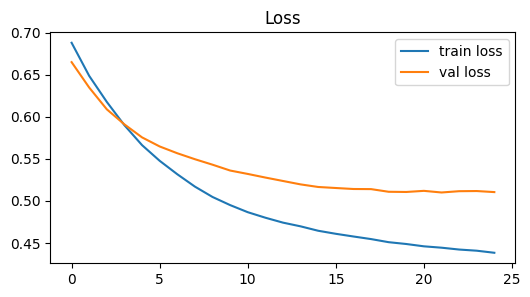

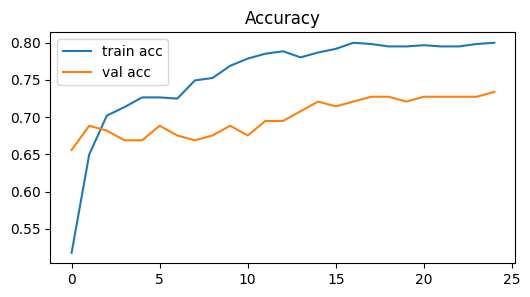

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Loss")
plt.show()

plt.figure(figsize=(6,3))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Accuracy")
plt.show()


### Problem 4: 3D Plot of House Price Prediction

write a python program to draw the 3d plot for the model developed for house price prediction using suitable python based 3d plotting libraries

|price|area|bedrooms|bathrooms|stories|mainroad|guestroom|basement|hotwaterheating|airconditioning|parking|prefarea|furnishingstatus|
|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
13300000|7420|4|2|3|yes|no|no|no|yes|2|yes|furnished
12250000|8960|4|4|4|yes|no|no|no|yes|3|no|furnished
12250000|9960|3|2|2|yes|no|yes|no|no|2|yes|semi-furnished
12215000|7500|4|2|2|yes|no|yes|no|yes|3|yes|furnished
11410000|7420|4|1|2|yes|yes|yes|no|yes|2|no|furnished

##### Importing Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score

import kagglehub
from kagglehub import KaggleDatasetAdapter

##### Loading Dataset

In [ ]:
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "harishkumardatalab/housing-price-prediction",
  "Housing.csv",
)

df.head()

100%|██████████| 29.3k/29.3k [00:00<00:00, 33.7MB/s]


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


##### Preprocess and encode categorical features

In [ ]:
data = df.copy()

bin_cols = df.keys()[5:-1].to_list()

for c in bin_cols:
    data[c] = data[c].astype(str).str.strip().str.lower().map(lambda x: 1 if x == "yes" else 0)

furn_dummies = pd.get_dummies(data["furnishingstatus"])
data = pd.concat([data.drop(columns=["furnishingstatus"]), furn_dummies], axis=1)

data = data.fillna(data.median(numeric_only=True))

display(data.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,0,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,0,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,0,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,0,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,0,0,True,False,False


##### Extracting Features & Targets

In [ ]:
y = data["price"].values
X = data.drop(columns=["price"]).values
feature_names = list(data.drop(columns=["price"]).columns)

print("Features used:", feature_names)
print("X shape:", X.shape, "y shape:", y.shape)

Features used: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished']
X shape: (545, 14) y shape: (545,)


##### Split into training & test dataset

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

##### Standardize the features of train & test dataset

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_val_s = scaler.transform(X_val)

##### Train the Random Forest Regressor Model

In [ ]:
rf = RandomForestRegressor(n_estimators=150, random_state=7)
rf.fit(X_train_s, y_train)

RandomForestRegressor(n_estimators=150, random_state=7)

##### Evaluating the model

In [ ]:
y_pred = rf.predict(X_val_s)
rmse = root_mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Validation RMSE: {rmse:,.2f}")
print(f"Validation R^2: {r2:.4f}")

Validation RMSE: 1,180,042.65
Validation R^2: 0.5818


##### Prepare grid for 3D surface (Area vs Bedrooms) and predict

In [ ]:
feat_x = "area"
feat_y = "bedrooms"

idx_x = feature_names.index(feat_x)
idx_y = feature_names.index(feat_y)

x_min, x_max = int(data[feat_x].min()), int(data[feat_x].max())
y_min, y_max = int(data[feat_y].min()), int(data[feat_y].max())

X_grid = np.linspace(x_min, x_max, 60)
Y_grid = np.arange(y_min, y_max+1)

XX, YY = np.meshgrid(X_grid, Y_grid)

n_points = XX.size
base_row = data.drop(columns=["price"]).median(numeric_only=True)

for c in bin_cols:
    base_row[c] = int(round(base_row[c]))

for c in furn_dummies.columns:
    base_row[c] = int(round(base_row[c]))

pred_rows = np.tile(base_row.values.astype(float), (n_points, 1))

pred_rows[:, idx_x] = XX.ravel()
pred_rows[:, idx_y] = YY.ravel()

pred_rows_s = scaler.transform(pred_rows)

Z_pred = rf.predict(pred_rows_s)
Z = Z_pred.reshape(YY.shape)


##### 3D plot of predicted surface + actual points

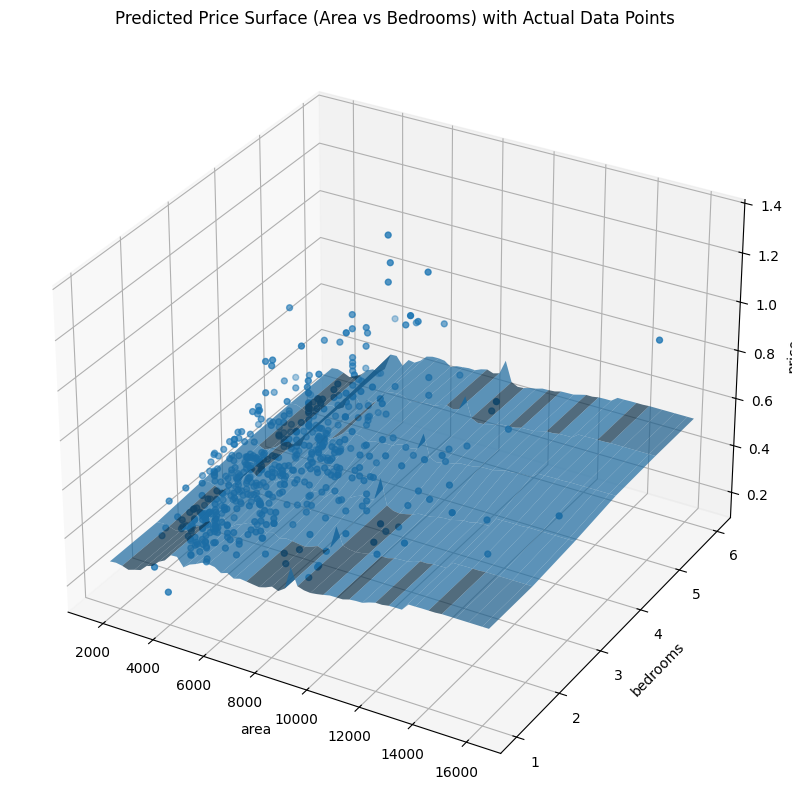

In [ ]:
fig = plt.figure(figsize=(8,17))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Predicted Price Surface (Area vs Bedrooms) with Actual Data Points")

surf = ax.plot_surface(XX, YY, Z, linewidth=0, antialiased=True, alpha=0.7)

xs = data[feat_x].values
ys = data[feat_y].values
zs = data["price"].values
ax.scatter(xs, ys, zs, s=18, depthshade=True)

ax.set_xlabel(feat_x)
ax.set_ylabel(feat_y)
ax.set_zlabel("price")
plt.tight_layout()
plt.show()
